In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re

import warnings
warnings.filterwarnings('ignore')

In [91]:
rooth = 'data/'
travels = pd.read_csv(rooth + 'Train.csv')

In [92]:
travels.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [93]:
# Shape
travels.shape

(21000, 15)

In [94]:
# Variables Type
travels.dtypes

Uniq Id                        object
Package Name                   object
Package Type                   object
Destination                    object
Itinerary                      object
Places Covered                 object
Travel Date                    object
Hotel Details                  object
Start City                     object
Airline                        object
Flight Stops                    int64
Meals                           int64
Sightseeing Places Covered     object
Cancellation Rules             object
Per Person Price              float64
dtype: object

In [95]:
# Info
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [96]:
# Null values
travels.isnull().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [97]:
# Unique values and value counts
for travel in travels.columns:
    print(f'UUNIQUE VALUES {travel}: {travels[travel].nunique()}')
    print(f'{travels[travel].value_counts()}')
    print('---------------------------------------------------------')

UUNIQUE VALUES Uniq Id: 21000
34917c2cb5a463337bcd404c31437146    1
7de466bdc89a6a8d8a5d43e834181a86    1
cfd1ba1493d2c6e1b86739a8a34f3de8    1
f9eb93a2e25032833454503194872d4e    1
8f4d22fe6e368daaa9ea1cb03a35a7d9    1
                                   ..
16f19243aac81b194879931b912f7325    1
20bde590a999b62689743752a6c244e6    1
6236b44dcfdbf35998507154ffca94a8    1
4f8135e0a88290e65e92bb8cecbd36b7    1
fac11ec1405a19a6998d6f6507aeb48d    1
Name: Uniq Id, Length: 21000, dtype: int64
---------------------------------------------------------
UUNIQUE VALUES Package Name: 2204
Holiday in Manali & Chandigarh from Chandigarh                37
Bali Special 4 Nights                                         36
Honeymoon Special - Bangkok Phuket & Krabi                    35
Serene Uttarakhand with Kausani                               33
Best of Kerala                                                32
                                                              ..
Heritage of Agra, Gwalior, 

In [98]:
travels.describe(include='all') # We only have 3 continuous variables (1 is our target)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
count,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000.000000,21000.000000,21000,21000,21000.000000
unique,21000,2204,5,565,966,565,495,6060,2,314,NaN,NaN,1714,10,NaN
top,34917c2cb5a463337bcd404c31437146,Holiday in Manali & Chandigarh from Chandigarh,Deluxe,Goa,3N Goa,Goa,19-06-2021,Not Available,New Delhi,Not Available,NaN,NaN,Not Available,Cancellation any time after making the 1st pay...,NaN
freq,1,37,6006,973,453,973,79,2929,13733,4910,NaN,NaN,1623,17574,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.870286,3.665429,NaN,NaN,20059.330381
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.834989,0.893631,NaN,NaN,11643.641766
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,NaN,NaN,791.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.000000,NaN,NaN,12461.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,17765.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,5.000000,NaN,NaN,25081.375000


##### Train Test Split before feature exploration. We will use the test for validation, and then see if our model generalizes well in the given test set by the hackathon

In [99]:
X = travels.drop(columns=['Per Person Price', 'Uniq Id'])
y = travels['Per Person Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16800, 13), (4200, 13), (16800,), (4200,))

In [101]:
X_train.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules'],
      dtype='object')

In [102]:
# See columns where str 'Not Available' is present
for travel in X_train.columns:
    try:
        if X_train[travel].str.contains('Not Available').any():
            print (travel)
            print(X_train[travel].str.contains('Not Available').value_counts())
    except:
        pass

# We have 4 columns where the str 'Not Available is present' 

Hotel Details
False    14410
True      2390
Name: Hotel Details, dtype: int64
Airline
False    12817
True      3983
Name: Airline, dtype: int64
Sightseeing Places Covered
False    15480
True      1320
Name: Sightseeing Places Covered, dtype: int64
Cancellation Rules
False    16154
True       646
Name: Cancellation Rules, dtype: int64


In [103]:
cat_var = ['Package Name', 'Package Type', 'Destination', 'Itinerary',
           'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
           'Airline', 'Sightseeing Places Covered',
           'Cancellation Rules']
X_train[cat_var].head()

,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
15345,"Pilgrimage tour to Thanjavur, Kumbakonam & Tir...",Premium,Tanjore|Kumbakonam|Tiruchirapally,1N Tanjore . 1N Kumbakonam . 1N Tiruchirapally,Tanjore|Kumbakonam|Tiruchirapally,10-05-2021,Sangam Hotel:4.4|Vinayaga by Poppys:3.8|Red Fo...,New Delhi,IndiGo|Spicejet,Not Available,Cancellation any time after making the 1st pay...
8476,Ultimate Himachal from Delhi(with Flights),Deluxe,Parwanoo|Shimla|Chail|Kasauli,1N Parwanoo . 3N Shimla . 2N Chail . 1N Kasauli,Parwanoo|Shimla|Chail|Kasauli,06-02-2021,Timber Trail Heights:3.8|Summit Thistle Villa ...,New Delhi,Spicejet,Viceregal Lodge | Mall road | Sadhu Pul | Cri...,Cancellation any time after making the 1st pay...
9052,A Vacation to South,Deluxe,Mysore|Coorg|Ooty,1N Mysore . 2N Coorg . 2N Ooty,Mysore|Coorg|Ooty,10-03-2021,"The Quorum:3.5|Club Mahindra Virajpet, Coorg:4...",New Delhi,Air India|Spicejet,Mysore Palace | Chamundi Hills | Dubare Eleph...,Cancellation any time after making the 1st pay...
17206,Self Drive Trip - Exploring Mughal Agra from D...,Premium,Agra,2N Agra,Agra,05-06-2021,Not Available,New Delhi,Not Available,Self Drive SUV for 2 days from Delhi,This cancellation policy is applicable for boo...
16188,Best of South India (Hotel & Car) - Value Added,Standard,Madurai|Rameshwaram|Kanyakumari|Kovalam and Po...,1N Madurai . 1N Rameshwaram . 1N Kanyakumari ....,Madurai|Rameshwaram|Kanyakumari|Kovalam and Po...,28-04-2021,Not Available,Mumbai,Not Available,Meenakshi Temple | Madurai Temple Darshan (Wi...,Cancellation any time after making the 1st pay...


In [104]:
# See if 'Destination' and 'Places Covered' columns are the same (by looking at the df it looks so)
X_train['Destination'].equals(X_train['Places Covered'])

True

In [105]:
# Drop column of Places Covered and Date Travel column to date_time
X_train.drop(columns='Places Covered', inplace=True)
X_test.drop(columns='Places Covered', inplace=True)
X_train['Travel Date'] = pd.to_datetime(X_train['Travel Date'])
X_test['Travel Date'] = pd.to_datetime(X_train['Travel Date'])

### Let's just first explore if all the packages with the same name have the same conditions (destination, itinerary, places covered). The others we can see that aren't always the same

In [106]:
X_train.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Travel Date', 'Hotel Details', 'Start City', 'Airline', 'Flight Stops',
       'Meals', 'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

In [107]:
# Interest Columns
cols = ['Destination', 'Itinerary', 'Sightseeing Places Covered']
for package in pd.unique(X_train['Package Name']):
    temp = X_train[X_train['Package Name'] == package]
    for col in temp[cols]:
            #print(col)
        if len(np.unique(temp[col]))==1:
            pass
        else: 
            print(package)
            print(f'{col} Not all values are the same')
            print('---------------------------------------------------------')

Best of Kashmir
Destination Not all values are the same
---------------------------------------------------------
Best of Kashmir
Itinerary Not all values are the same
---------------------------------------------------------
Best of Kashmir
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Port Blair and Havelock Scuba Dive Special - 4 Nights
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Port Blair, Havelock in 5 Nights with Parasailing
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Northeast Wow Darjeeling & Gangtok - Winter Special
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Gangtok Pelling & Darjeeling - Winter Special
Sightseeing Places Covered Not all values are the same
-------------------------------------------------

Splendours of Kerala Honeymoon Special
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Rajasthan Adventure Special with Guided Leopard Safari
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
A Relaxing holiday to Kerala (Honeymoon Special)
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Amazing Kerala
Destination Not all values are the same
---------------------------------------------------------
Amazing Kerala
Itinerary Not all values are the same
---------------------------------------------------------
Amazing Kerala
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Dubai Holiday - 4 Nights without Flight
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Quickation in

Best of Kashmir - Honeymoon Special
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Port Blair and Havelock Scuba Dive Special - 6 Nights
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Theme Park Special Dubai Holiday - 4 nights
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Essential Andaman in 6 Nights
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Port Blair and Havelock in 5 nights
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Marvels of Andaman 6 nights land only
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Kodaikanal with Ooty Special (Honeymoon Special)
Sightseeing Places Covered Not all 

Experiential Jaipur Holiday for the Young at Heart
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Bali Vegetarian Delight - 5N
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
A Grand Week in North East - Lachung Special
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Best of Andaman Hotel & Car
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Spectacular South - Value Added
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Classic Andaman Hotel & Car Only
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Weekend Udaipur & Mount Abu by Volvo from Ahmedabad
Sightseeing Places Covered Not all values are the sa

In [108]:
## We can see that not all the features of a given package are always the same

#### Prepare our data

In [109]:
def prepare_dest_airline_sight_hotel(df, columns):
    
    for column in df[columns]:
        # Empty list for the number of occurances in each column
        max_column = []

        # Split by the separator 
        df[f'{column}_split'] = df[column].str.split('|')

        # Know the maximum lenght presented on the list created
        for i in df[f'{column}_split']:
            max_column.append(len(i))     
        max_lenght = max(max_column)

        # Create new columns for each of destination, airlines, sigtseeings and hotels
        for n in range(0, max_lenght):
            df[f'{column}_{n+1}'] = df[column].str.split('|', expand=True)[n]

        # Drop original column and Column_split
        df.drop(columns=[column, f'{column}_split'], inplace=True)

        # Fill null values with 0
        df.fillna(0, inplace = True)

    return df

In [110]:
# Prepare "Itinerary" column - nº of nights
def itinerary(df):
    
    nights_list = []
    
    # Use regex to find the different number of nights in each destination
    for i in df['Itinerary']:
        n_nights = re.findall(r'[0-9]+', i)
        nights_list.append(n_nights)

    temp = pd.DataFrame(nights_list)

    # Rename Columns
    for i, column in enumerate(temp.columns):
        temp.rename(columns = {column: f'Nights_destination_{i+1}'}, inplace = True)

    # Fill null values with 0
    temp.fillna(0, inplace = True)
    temp = temp.astype('int64')
    
    # Prepare temp with thesame index as initial df
    index_df = df.index
    temp.set_index(index_df, inplace=True)
    
    # Joint
    df_ = df.join(temp)
    
    # Drop Itinerary Column
    df_final = df_.drop(columns=['Itinerary'])
    
    # Compute Total Nights
    df_final["Total_nights"] = temp.sum(axis=1)
    
    return df_final


In [111]:
X_train = prepare_dest_airline_sight_hotel(X_train, ['Destination', 'Airline', 'Sightseeing Places Covered', 'Hotel Details'])

In [112]:
X_train = itinerary(X_train)

In [113]:
X_train.head()

,Package Name,Package Type,Travel Date,Start City,Flight Stops,Meals,Cancellation Rules,Destination_1,Destination_2,Destination_3,...,Nights_destination_3,Nights_destination_4,Nights_destination_5,Nights_destination_6,Nights_destination_7,Nights_destination_8,Nights_destination_9,Nights_destination_10,Nights_destination_11,Total_nights
15345,"Pilgrimage tour to Thanjavur, Kumbakonam & Tir...",Premium,2021-10-05,New Delhi,0,5,Cancellation any time after making the 1st pay...,Tanjore,Kumbakonam,Tiruchirapally,...,1,0,0,0,0,0,0,0,0,3
8476,Ultimate Himachal from Delhi(with Flights),Deluxe,2021-06-02,New Delhi,1,3,Cancellation any time after making the 1st pay...,Parwanoo,Shimla,Chail,...,2,1,0,0,0,0,0,0,0,7
9052,A Vacation to South,Deluxe,2021-10-03,New Delhi,1,3,Cancellation any time after making the 1st pay...,Mysore,Coorg,Ooty,...,2,0,0,0,0,0,0,0,0,5
17206,Self Drive Trip - Exploring Mughal Agra from D...,Premium,2021-05-06,New Delhi,0,5,This cancellation policy is applicable for boo...,Agra,0,0,...,0,0,0,0,0,0,0,0,0,2
16188,Best of South India (Hotel & Car) - Value Added,Standard,2021-04-28,Mumbai,2,3,Cancellation any time after making the 1st pay...,Madurai,Rameshwaram,Kanyakumari,...,1,2,0,0,0,0,0,0,0,5


### EDA

<AxesSubplot:>

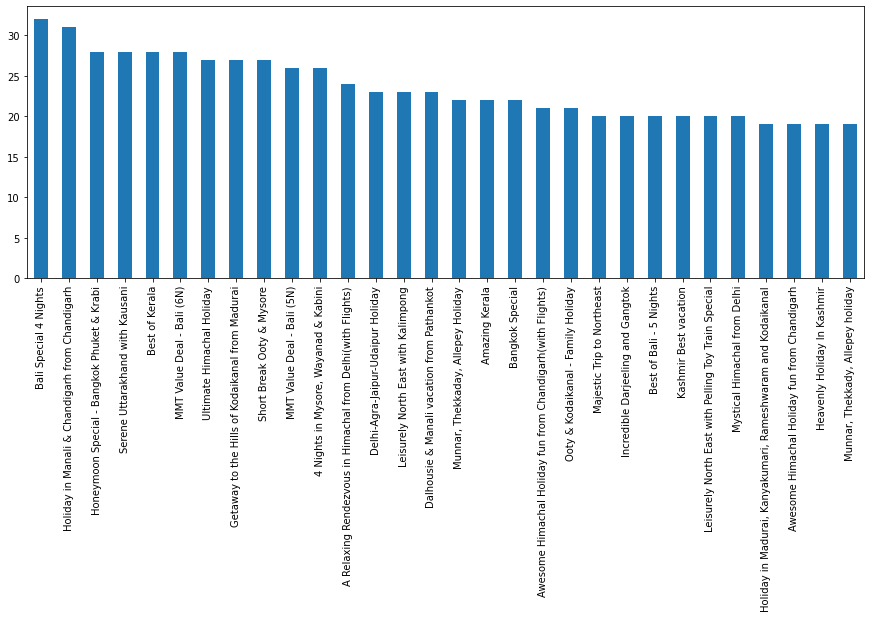

In [114]:
# Most Chosen Packages
plt.figure(figsize = (15,5))
X_train['Package Name'].value_counts().nlargest(30).plot.bar()

<AxesSubplot:>

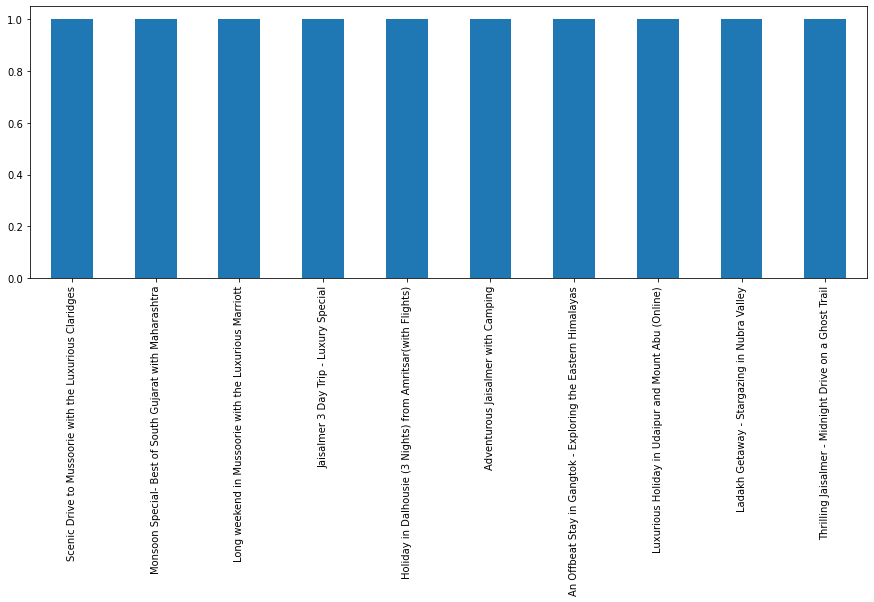

In [153]:
# Most Chosen Packages
plt.figure(figsize = (15,5))
X_train['Package Name'].value_counts().nsmallest(10).plot.bar()

<AxesSubplot:>

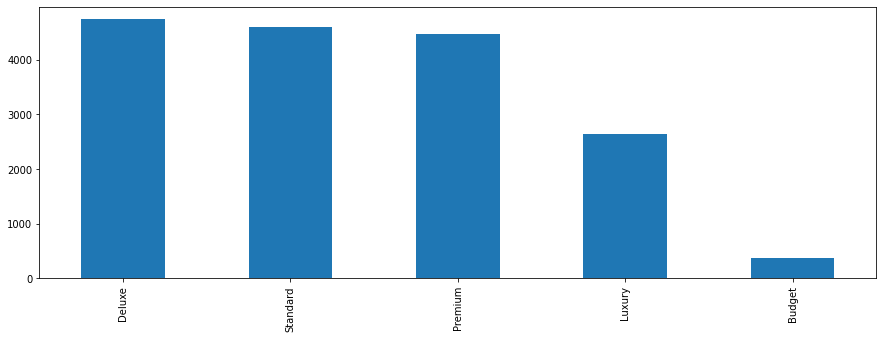

In [115]:
# Most chosen package type
plt.figure(figsize = (15,5))
X_train['Package Type'].value_counts().nlargest(5).plot.bar()

In [146]:
# Group by Package type 
df_train = pd.concat([X_train, y_train], axis=1)
package_price = df_train.groupby(['Package Type'])[['Per Person Price']].mean().reset_index()

In [147]:
package_price

,Package Type,Per Person Price
0,Budget,13813.047043
1,Deluxe,18258.867237
2,Luxury,23444.732523
3,Premium,23841.772462
4,Standard,16359.247010


<AxesSubplot:xlabel='Per Person Price', ylabel='Package Type'>

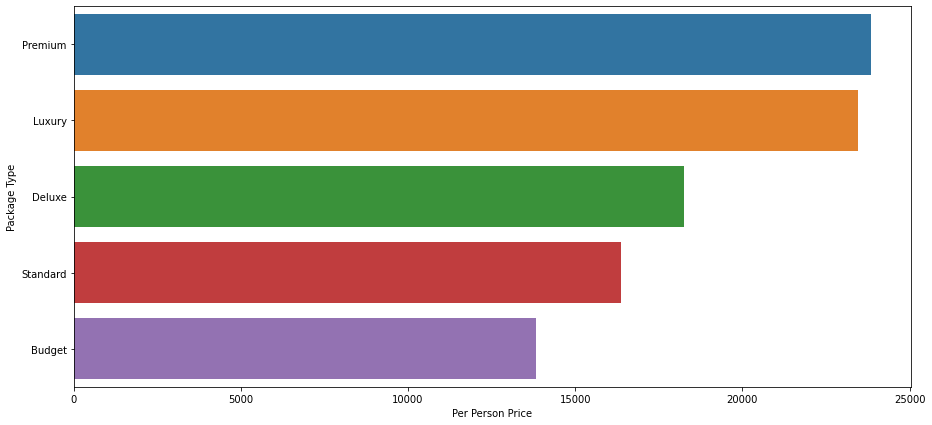

In [155]:
plt.figure(figsize = (15,7))
sns.barplot(x="Per Person Price", y='Package Type', data = package_price.sort_values(by="Per Person Price", ascending=False))

<AxesSubplot:xlabel='Per Person Price', ylabel='Total_nights'>

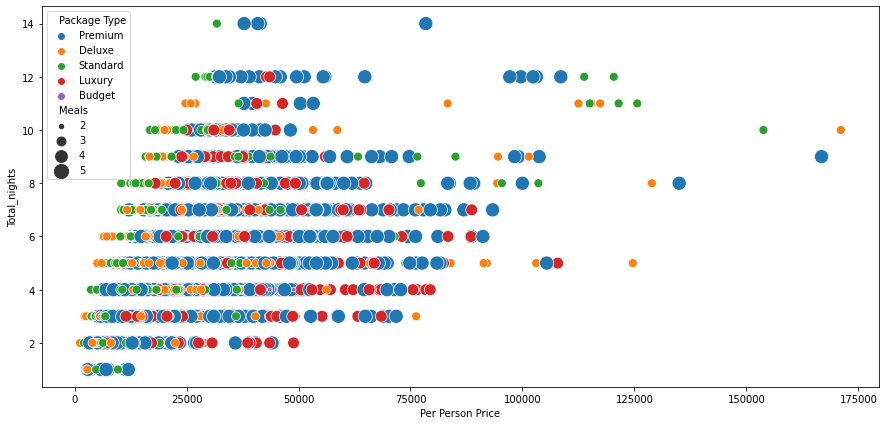

In [165]:
# See if there is any relation with the total nights
plt.figure(figsize=(15,7))
sns.scatterplot(df_train['Per Person Price'], df_train['Total_nights'], hue=df_train['Package Type'], size=df_train['Meals'], sizes=(20, 200))

##### We can see that the packages Premium and Luxury have the most number of meals, but the price per person doesn't strictly depend on that

<AxesSubplot:xlabel='Per Person Price', ylabel='Total_nights'>

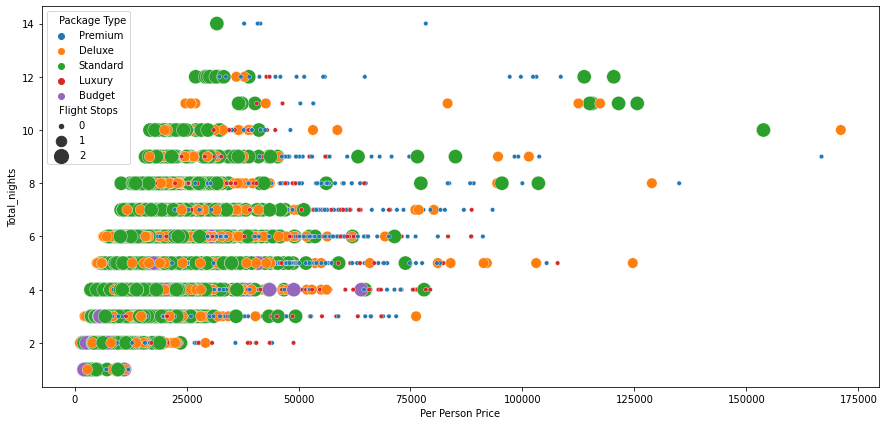

In [166]:
# Number of flight stops
plt.figure(figsize=(15,7))
sns.scatterplot(df_train['Per Person Price'], df_train['Total_nights'], hue=df_train['Package Type'], size=df_train['Flight Stops'], sizes=(20, 200))

##### We can see that the packages Standard and Budget have the most number of flight stops,, but the price per person doesn't strictly depend on that

<AxesSubplot:xlabel='Travel Date', ylabel='Per Person Price'>

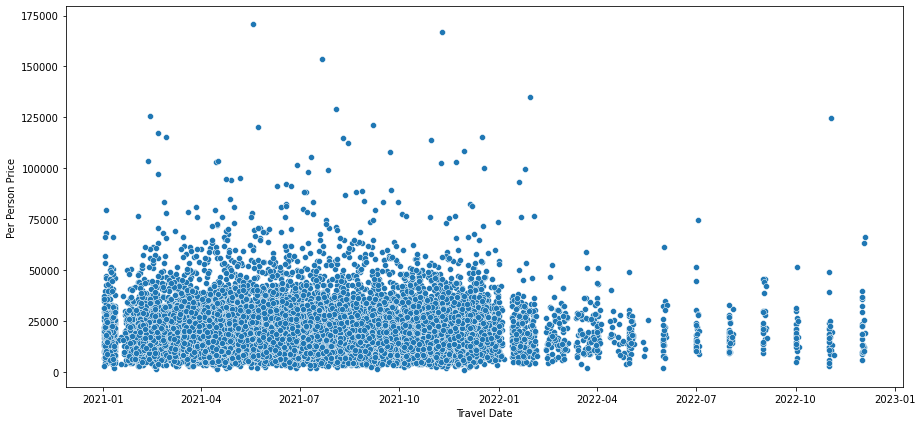

In [213]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_train['Travel Date'], df_train['Per Person Price'])

##### We can see that the most of the trips have reservation for the year of 2021

### Try to understand what makes the price per person increase. We have already seen that meals, nights and flights stops depend on the packages.
See if the Destination, Airline, Places Covered and Hotels justify the most expensive prices

In [170]:
df_train.columns

Index(['Package Name', 'Package Type', 'Travel Date', 'Start City',
       'Flight Stops', 'Meals', 'Cancellation Rules', 'Destination_1',
       'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5',
       'Destination_6', 'Destination_7', 'Destination_8', 'Destination_9',
       'Destination_10', 'Destination_11', 'Airline_1', 'Airline_2',
       'Airline_3', 'Airline_4', 'Airline_5', 'Airline_6', 'Airline_7',
       'Airline_8', 'Airline_9', 'Airline_10', 'Airline_11',
       'Sightseeing Places Covered_1', 'Sightseeing Places Covered_2',
       'Sightseeing Places Covered_3', 'Sightseeing Places Covered_4',
       'Sightseeing Places Covered_5', 'Sightseeing Places Covered_6',
       'Sightseeing Places Covered_7', 'Sightseeing Places Covered_8',
       'Sightseeing Places Covered_9', 'Sightseeing Places Covered_10',
       'Sightseeing Places Covered_11', 'Sightseeing Places Covered_12',
       'Sightseeing Places Covered_13', 'Sightseeing Places Covered_14',
       

In [209]:
most_expensive = df_train[df_train['Per Person Price'] > 90000]
less_expensive = df_train[df_train['Per Person Price'] < 3000]

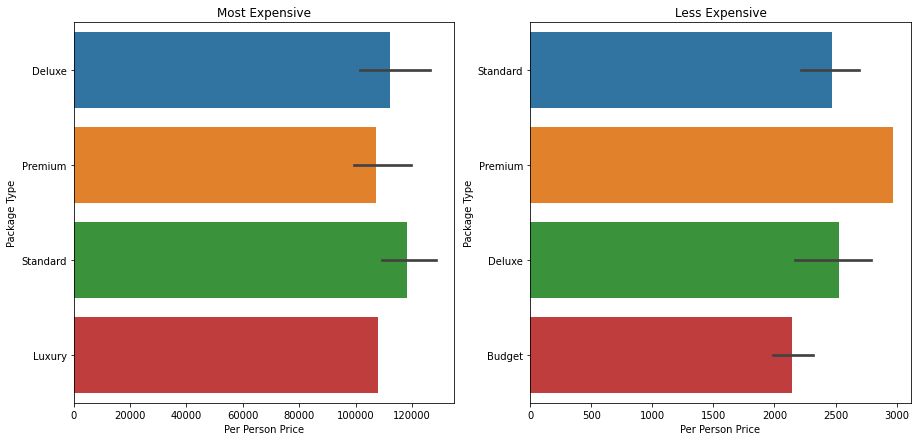

In [236]:
# Package Type
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
sns.barplot(x="Per Person Price", y='Package Type', data = most_expensive.sort_values(by="Per Person Price", ascending=False), ax=ax1)
ax1.title.set_text('Most Expensive')
sns.barplot(x="Per Person Price", y='Package Type', data = less_expensive.sort_values(by="Per Person Price", ascending=False), ax=ax2)
ax2.title.set_text('Less Expensive')

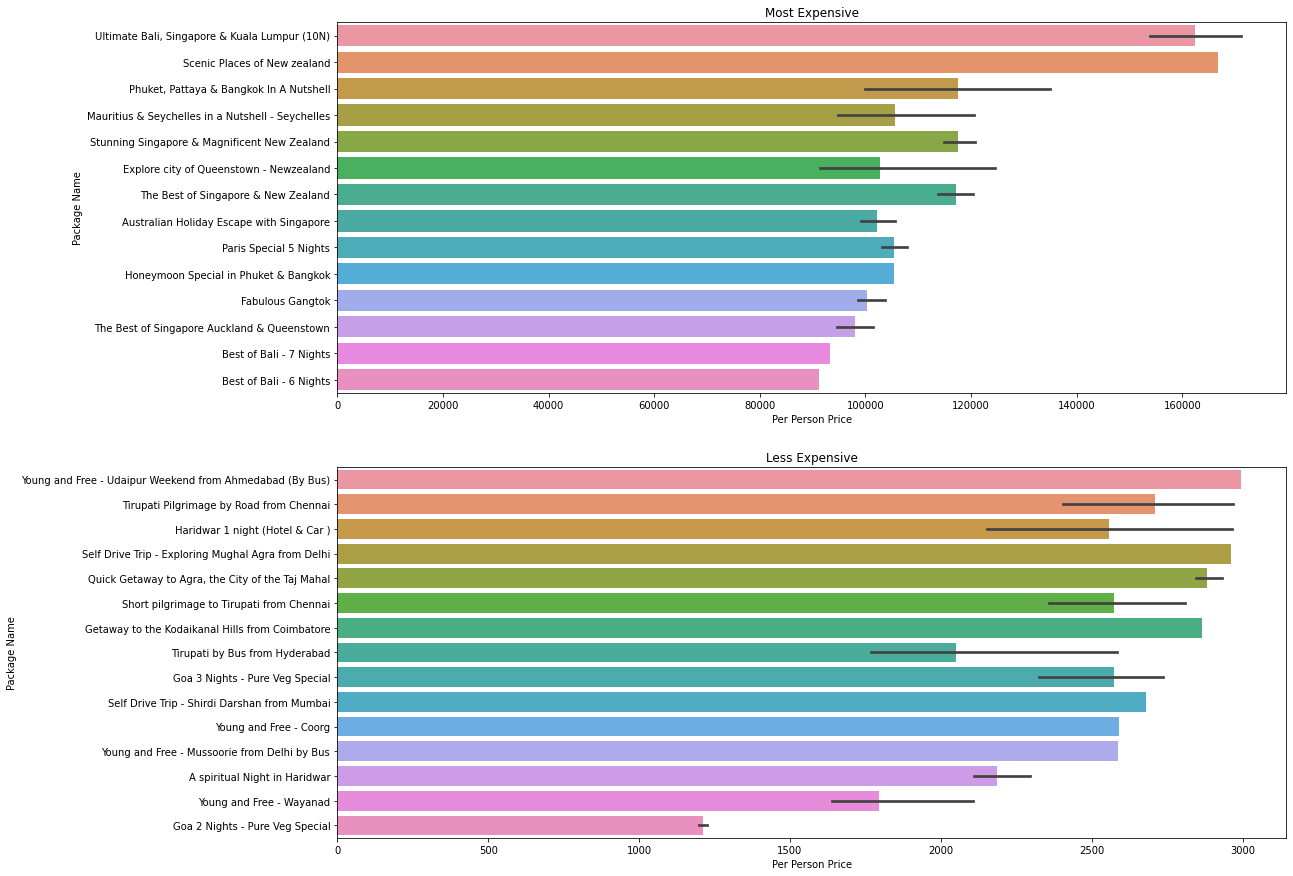

In [235]:
# Package
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(17,15))
sns.barplot(x="Per Person Price", y='Package Name', data = most_expensive.sort_values(by="Per Person Price", ascending=False), ax=ax1)
ax1.title.set_text('Most Expensive')
sns.barplot(x="Per Person Price", y='Package Name', data = less_expensive.sort_values(by="Per Person Price", ascending=False), ax=ax2)
ax2.title.set_text('Less Expensive')

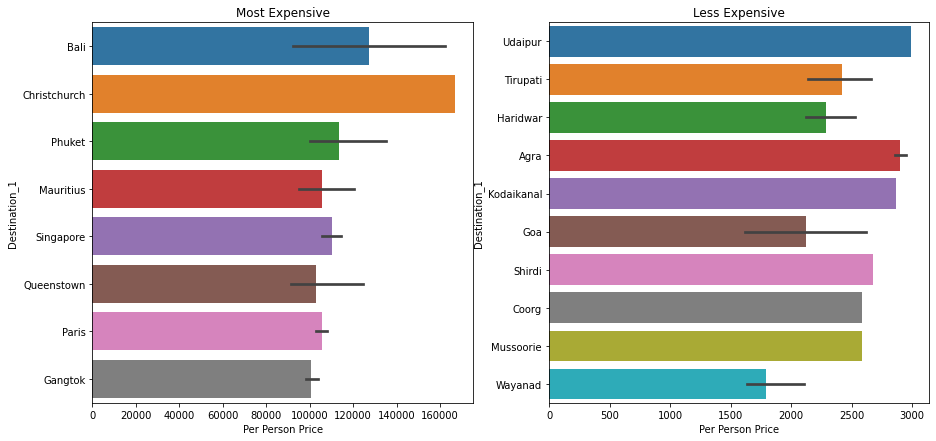

In [238]:
# Package Type
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
sns.barplot(x="Per Person Price", y='Destination_1', data = most_expensive.sort_values(by="Per Person Price", ascending=False), ax=ax1)
ax1.title.set_text('Most Expensive')
sns.barplot(x="Per Person Price", y='Destination_1', data = less_expensive.sort_values(by="Per Person Price", ascending=False), ax=ax2)
ax2.title.set_text('Less Expensive')